In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date,timedelta
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace import sarimax

In [2]:
today = date.today()
end_date = today.strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=1000)).strftime("%Y-%m-%d")

In [3]:
print("Start_date : ",start_date)
print("End_date : ",end_date)

Start_date :  2020-12-23
End_date :  2023-09-19


In [4]:
ticker = 'GOOGL'
df = yf.download(ticker,start=start_date,end=end_date,progress=False)

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,86.196503,87.205498,86.059998,86.411499,86.411499,22974000
2020-12-24,86.449997,87.120499,86.217499,86.708000,86.708000,9312000
2020-12-28,87.245499,89.349998,87.091003,88.697998,88.697998,27650000
2020-12-29,89.361504,89.423500,87.755501,87.888000,87.888000,19726000
2020-12-30,88.250000,88.388000,86.400002,86.812500,86.812500,21026000
...,...,...,...,...,...,...
2023-09-12,136.259995,136.869995,135.190002,135.339996,135.339996,18405500
2023-09-13,135.089996,136.899994,134.149994,136.710007,136.710007,20749500
2023-09-14,137.600006,138.699997,136.240005,138.100006,138.100006,24751000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 687 entries, 2020-12-23 to 2023-09-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       687 non-null    float64
 1   High       687 non-null    float64
 2   Low        687 non-null    float64
 3   Close      687 non-null    float64
 4   Adj Close  687 non-null    float64
 5   Volume     687 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 37.6 KB


In [7]:
df.insert(0,"Date",df.index,True)

In [8]:
df.reset_index(drop=True,inplace=True)

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-23,86.196503,87.205498,86.059998,86.411499,86.411499,22974000
1,2020-12-24,86.449997,87.120499,86.217499,86.708000,86.708000,9312000
2,2020-12-28,87.245499,89.349998,87.091003,88.697998,88.697998,27650000
3,2020-12-29,89.361504,89.423500,87.755501,87.888000,87.888000,19726000
4,2020-12-30,88.250000,88.388000,86.400002,86.812500,86.812500,21026000
...,...,...,...,...,...,...,...
682,2023-09-12,136.259995,136.869995,135.190002,135.339996,135.339996,18405500
683,2023-09-13,135.089996,136.899994,134.149994,136.710007,136.710007,20749500
684,2023-09-14,137.600006,138.699997,136.240005,138.100006,138.100006,24751000
685,2023-09-15,137.979996,138.520004,136.479996,137.399994,137.399994,38908400


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       687 non-null    datetime64[ns]
 1   Open       687 non-null    float64       
 2   High       687 non-null    float64       
 3   Low        687 non-null    float64       
 4   Close      687 non-null    float64       
 5   Adj Close  687 non-null    float64       
 6   Volume     687 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 37.7 KB


In [11]:
df = df[['Date','Close']]

In [12]:
df.head()

,Date,Close
0,2020-12-23,86.411499
1,2020-12-24,86.708000
2,2020-12-28,88.697998
3,2020-12-29,87.888000
4,2020-12-30,86.812500


In [13]:
fig = px.line(df,x="Date", y="Close", title="Google Stock Price")
fig.show()

In [14]:
def check_stationary(df):
  result = adfuller(df)
  print("ADF Test Statistic :",result[0])
  print("p-value : ",result[1])
  if result[1] <= 0.05:
      print("Data is stationary")
  else:
      print("Data is not stationary")

check_stationary(df['Close'])

ADF Test Statistic : -1.9581833989562374
p-value :  0.30520366215223527
Data is not stationary


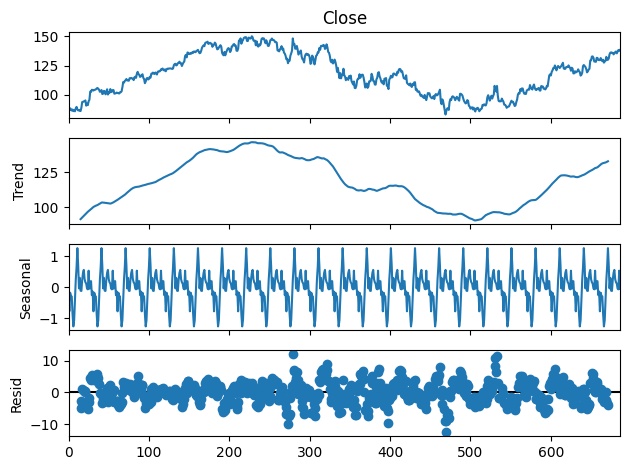

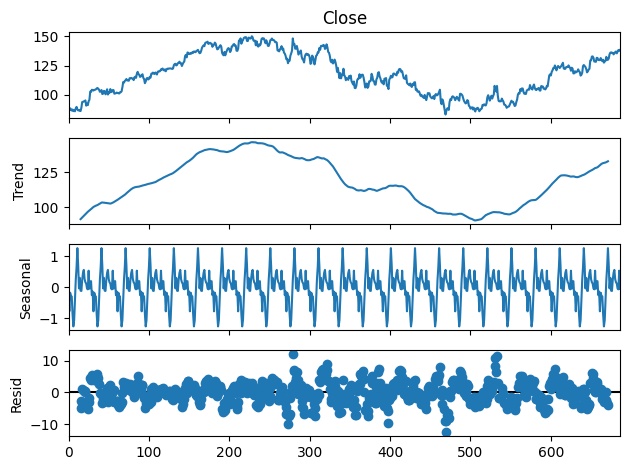

In [15]:
decompose = seasonal_decompose(df['Close'],model="additive",period=30)
decompose.plot()

In [16]:
# First difference
df['Seasonal First Difference']=df['Close']-df['Close'].shift(30)

<ipython-input-16-86023f0a7a2e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
## Again test dickey fuller test
check_stationary(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.333508826708962
p-value :  0.00038846170318557806
Data is stationary


<Axes: >

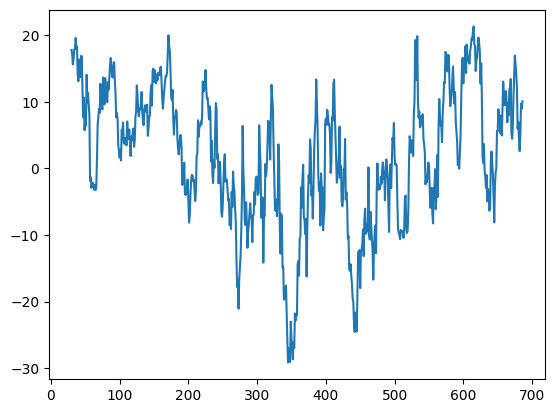

In [18]:
df['Seasonal First Difference'].plot()

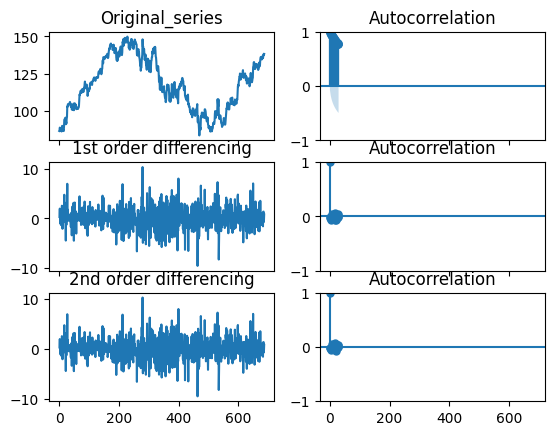

In [19]:
fig,axes = plt.subplots(3,2,sharex=True)
axes[0,0].plot(df['Close']); axes[0,0].set_title("Original_series")
plot_acf(df['Close'], ax=axes[0,1])

# 1st differencing
axes[1,0].plot(df['Close'].diff()); axes[1,0].set_title("1st order differencing")
plot_acf(df['Close'].diff().dropna(), ax=axes[1,1])

# 2nd differencing
axes[2,0].plot(df['Close'].diff()); axes[2,0].set_title("2nd order differencing")
plot_acf(df['Close'].diff().dropna(), ax=axes[2,1])

plt.show()

In [20]:
# Got the d value
d = 1

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

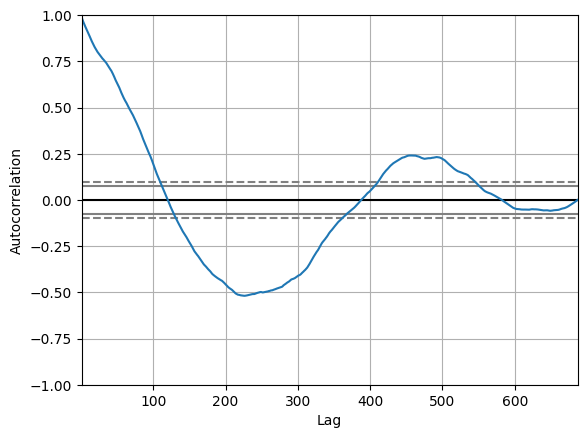

In [21]:
pd.plotting.autocorrelation_plot(df['Close'])

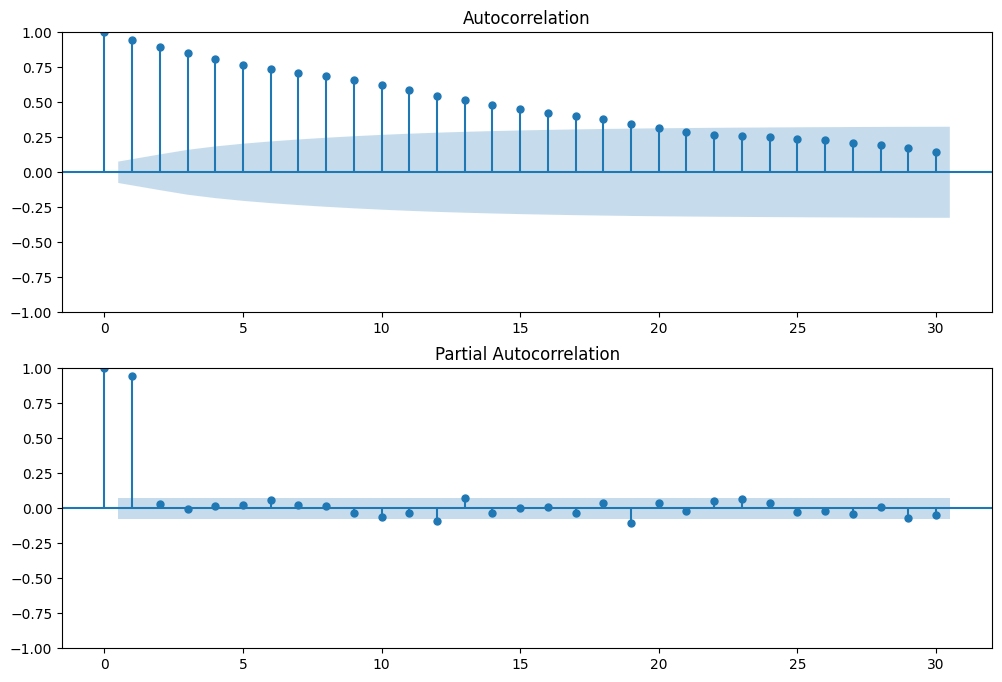

In [22]:
fig2 = plt.figure(figsize=(12,8))
ax1 = fig2.add_subplot(211)
fig2 = plot_acf(df['Seasonal First Difference'].dropna(),lags=30,ax=ax1)
ax2 = fig2.add_subplot(212)
fig2 = plot_pacf(df['Seasonal First Difference'].dropna(),lags=30,ax=ax2)

In [23]:
pacf_vals = pd.DataFrame(pacf(df['Close']))
acf_vals = pd.DataFrame(acf(df['Close']))

In [24]:
print(pacf_vals)

           0
0   1.000000
1   0.989715
2   0.010436
3   0.024307
4   0.048183
5   0.005432
6   0.029817
7   0.017094
8   0.026144
9  -0.010128
10 -0.028505
11 -0.008824
12 -0.052469
13  0.017000
14 -0.002681
15  0.007617
16  0.030478
17 -0.018774
18  0.050997
19 -0.040830
20  0.060387
21 -0.001186
22  0.019645
23  0.043657
24  0.024527
25 -0.024843
26  0.033438
27 -0.015603
28  0.063554


In [25]:
print(acf_vals)

           0
0   1.000000
1   0.988274
2   0.976896
3   0.966141
4   0.956470
5   0.946968
6   0.938110
7   0.929610
8   0.921662
9   0.913485
10  0.904750
11  0.895881
12  0.886089
13  0.876813
14  0.867652
15  0.858848
16  0.850744
17  0.842400
18  0.835095
19  0.826993
20  0.820071
21  0.813022
22  0.806415
23  0.800482
24  0.795140
25  0.789168
26  0.783853
27  0.778238
28  0.773791


In [26]:
# Got p,q value
p = 2
q = 5

In [27]:
import statsmodels.api as sm

In [28]:
model = sm.tsa.statespace.SARIMAX(df['Close'],order=(p,d,q),seasonal_order=(p,d,q,30))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  687
Model:             SARIMAX(2, 1, 5)x(2, 1, 5, 30)   Log Likelihood               -1518.568
Date:                            Tue, 19 Sep 2023   AIC                           3067.137
Time:                                    23:18:11   BIC                           3134.429
Sample:                                         0   HQIC                          3093.227
                                            - 687                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4689      0.014    105.026      0.000       1.441       1.496
ar.L2         -0.9909      0.012    -83.609      0.000      -1.014      -0.968
ma.L1         -1.5001      0.034    -43.590      0.000      -1.568      -1.433
ma.L2          0.9974      0.049     20.344      0.000       0.901       1.093
ma.L3         -0.0221      0.036     -0.619      0.536      -0.092       0.048
ma.L4          0.0302      0.024      1.255      0.209      -0.017       0.077
ma.L5         -0.0602      0.023     -2.672      0.008      -0.104      -0.016
ar.S.L30      -1.9801      0.389     -5.087      0.000      -2.743      -1.217
ar.S.L60      -0.9883      0.233     -4.238      0.000      -1.445      -0.531
ma.S.L30       0.9682      0.555      1.745      0.081      -0.119       2.056
ma.S.L60      -1.0689      0.212     -5.047      0.000      -1.484      -0.654
ma.S.L90      -1.0373      0.220     -4.720      0.000      -1.468      -0.607
ma.S.L120      0.0765      0.037      2.090      0.037       0.005       0.148
ma.S.L150      0.0615      0.027      2.245      0.025       0.008       0.115
sigma2         5.1620      0.919      5.618      0.000       3.361       6.963
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.09
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
forecast = model_fit.predict(len(df['Close']),len(df['Close'])+40,dynamic=True)
print(forecast)

687    137.909042
688    137.730982
689    137.034564
690    137.335269
691    137.292690
692    138.598516
693    138.900646
694    138.666508
695    137.816976
696    136.894257
697    137.004871
698    137.598009
699    138.614304
700    139.432338
701    140.432142
702    139.895490
703    139.157943
704    139.125226
705    138.645538
706    138.456308
707    139.014286
708    139.648908
709    139.892181
710    139.931902
711    139.597814
712    139.165587
713    138.689289
714    138.617943
715    139.255255
716    139.124800
717    139.665297
718    140.143575
719    139.881039
720    139.795655
721    138.768454
722    138.964352
723    138.794409
724    139.097831
725    138.978204
726    139.230905
727    139.709583
Name: predicted_mean, dtype: float64


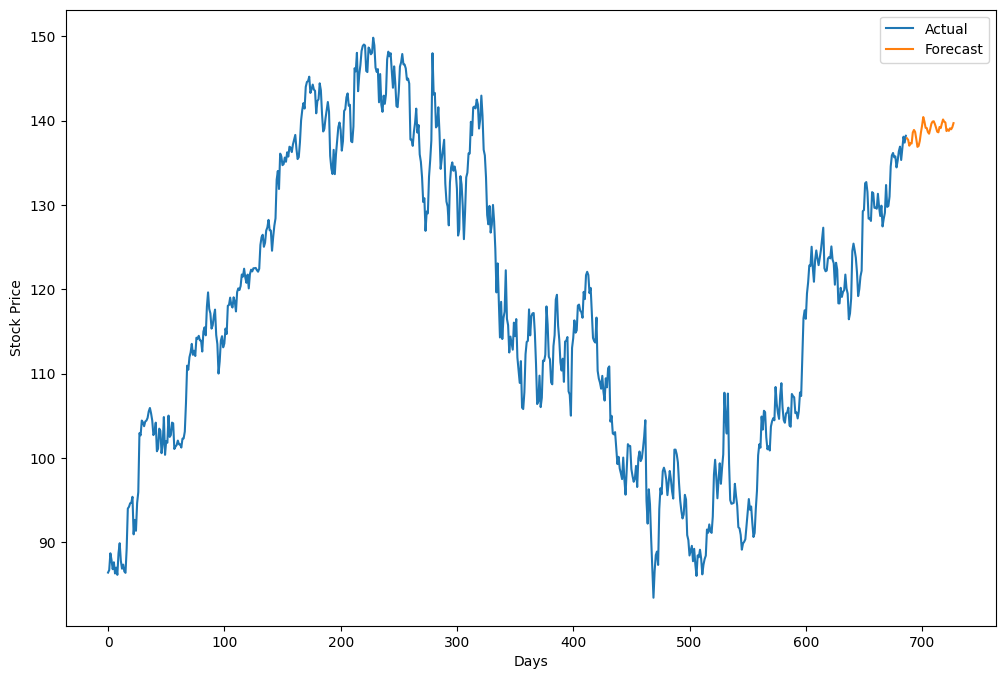

In [31]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'],label="Actual")
plt.plot(forecast,label="Forecast")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()